<a href="https://colab.research.google.com/github/chunyuan0221/3rd-ML100days/blob/master/Day078_CheckBeforeTrain_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

### 學習目標
- 訓練神經網路前，需注意的事項:
  1. 確認使用裝置(CPU or GPU)
  2. Preprocessing:Input data(X)是否有進行合適的標準化
  3. Preprocessing:Output data(Y)是否進行適當的處理(Encoding)
  4. Model Graph:模型架構是否如預期所想(DNN、CNN、RNN)
  5. Hyper parameter: 訓練模型中的超參數是否設定得當

### ANS
- 我們發現將神經網路層數從3層增加到5層時，有幾項結果:
  1. train data的Accuracy上升的速度比3層成長的快，但相對而言訓練時間也大幅上升。
  2. 用test data驗證的Accuracy從50%上升至55%左右
  3. 因此，增加神經網路的複雜度，對驗證的Accuracy是有改善的

***
- 3 layers acc

![3 layers](https://drive.google.com/uc?id=1L3mI789ANgvPwSfuU0v9ZoMK7df4I8iR)

- 5 layers acc

![5 layers](https://drive.google.com/uc?id=1bxkX6kjA137n4J3ScD6WoVeki3pWolb9)

In [11]:
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Activation, Input
#from keras.layers import Dense, Conv2D, MaxPooling2D
from keras import optimizers

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [0]:
train, test = keras.datasets.cifar10.load_data()

Mean Normalization


In [0]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x_norm = (x - np.mean(x)) / (np.max(x) - np.min(x))
    if flatten:
        x_norm = x_norm.reshape((len(x_norm), -1))
    return x_norm

def preproc_y(y):
    y_ohe = keras.utils.to_categorical(y)
    return y_ohe

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

print('X do flatten, Y do onehot:\n')
print(f'X shape: train={x_train.shape}, test={x_test.shape}')
print(f'Y shape: train={y_train.shape}, test={y_test.shape}')

X do flatten, Y do onehot:

X shape: train=(50000, 3072), test=(10000, 3072)
Y shape: train=(50000, 10), test=(10000, 10)


In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128, 64]):
    input_layer = Input(input_shape)

    for i, n_units in enumerate(num_neurons):
        if i==0:
            x = Dense(units=n_units, activation='relu', name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = Dense(units=n_units, activation='relu', name="hidden_layer"+str(i+1))(x)
    
    out = Dense(units=output_units, activation='softmax')(x)
    model = Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])

In [0]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
opt = optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/100





50000/50000 [==============================] - 26s 520us/step - loss: 1.6875 - acc: 0.3994 - val_loss: 1.5486 - val_acc: 0.4499
Epoch 2/100
50000/50000 [==============================] - 25s 507us/step - loss: 1.4439 - acc: 0.4875 - val_loss: 1.4213 - val_acc: 0.4975
Epoch 3/100
50000/50000 [==============================] - 26s 512us/step - loss: 1.3193 - acc: 0.5345 - val_loss: 1.3729 - val_acc: 0.5195
Epoch 4/100
50000/50000 [==============================] - 26s 512us/step - loss: 1.2153 - acc: 0.5724 - val_loss: 1.3344 - val_acc: 0.5245
Epoch 5/100
50000/50000 [==============================] - 26s 513us/step - loss: 1.1175 - acc: 0.6037 - val_loss: 1.3389 - val_acc: 0.5326
Epoch 6/100
50000/50000 [==============================] - 26s 515us/step - loss: 1.0198 - acc: 0.6367 - val_loss: 1.3088 - val_acc: 0.5519
Epoch 7/

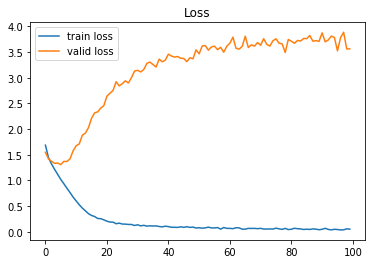

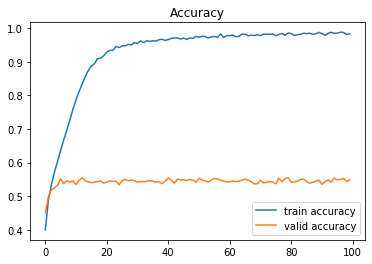

In [10]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()